In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, roc_auc_score,
                            accuracy_score, precision_score, recall_score, f1_score,
                            mean_squared_error, mean_absolute_error, r2_score)
import warnings
warnings.filterwarnings('ignore')

In [28]:
# ============== 1. Data Loading and Initial Exploration ==============
# Load the dataset
# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")
csv_path = os.path.join(path, "water_potability.csv")  # Construct the path to the CSV file


df = pd.read_csv(csv_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()
print("\nDescriptive Statistics:")
df.describe()

Dataset Shape: (3276, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Descriptive Statistics:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [29]:
# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")


Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Total missing values: 1434


In [30]:
# ============== 2. Data Cleaning and Preprocessing ==============
# Calculate means of columns with missing values
print("\nMean values for columns with missing data:")
print("ph mean:", df["ph"].mean())
print("Sulfate mean:", df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())

# Fill missing values with mean (as in the higher-accuracy implementation)
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isna().sum())


Mean values for columns with missing data:
ph mean: 7.080794504276835
Sulfate mean: 333.7757766108135
Trihalomethanes mean: 66.39629294676803

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


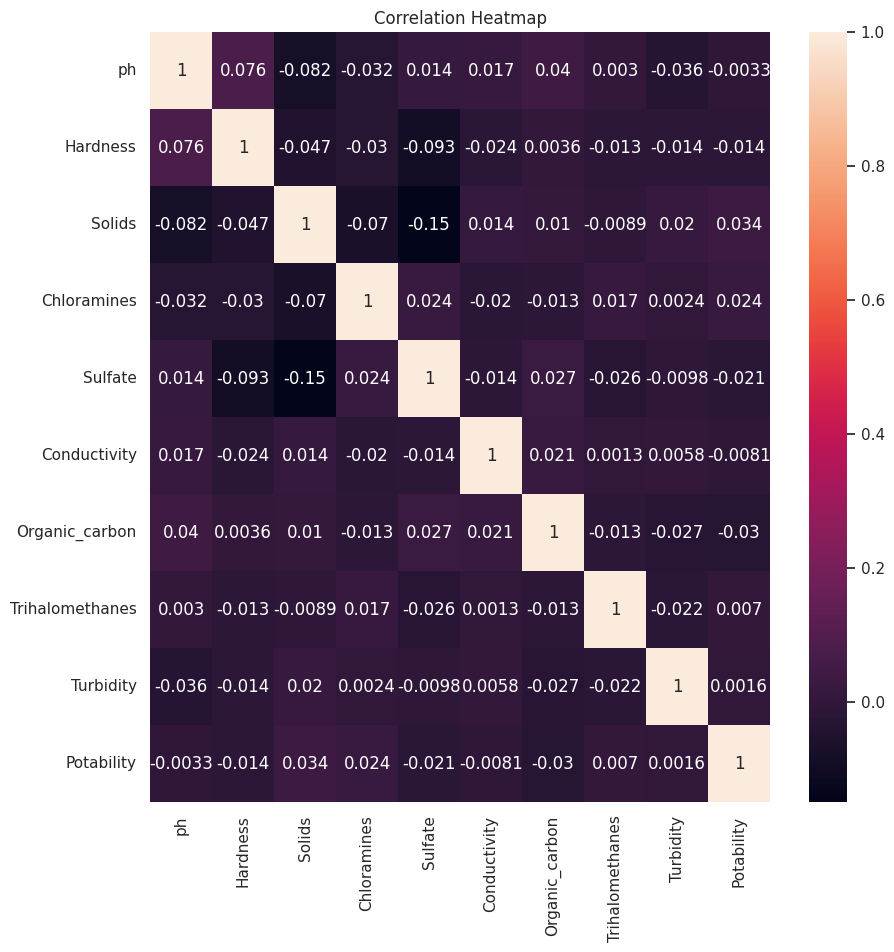

In [72]:
# ============== 3. Exploratory Data Analysis ==============
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2g")
plt.title('Correlation Heatmap')
plt.show()

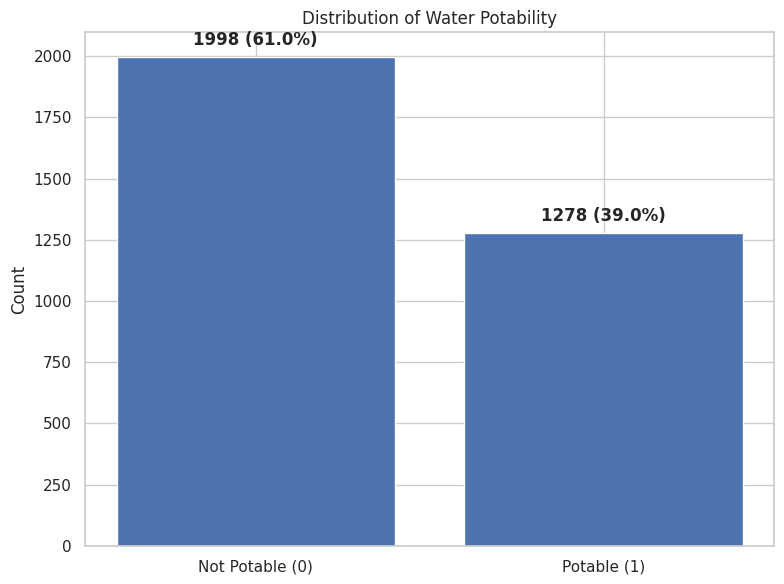

In [42]:
# Distribution of the target variable
# plt.figure(figsize=(8, 6))
# potability_counts = df['Potability'].value_counts()
# sns.countplot(x="Potability", data=df, palette={'0': 'pink', '1': 'purple'})
# plt.xlabel('Potable Water:         0 (pink) -> No,       1 (purple) -> Yes')
# plt.ylabel('Amount of water')
# porc = (len(df[df.Potability==1]) / len(df.Potability)) * 100
# print('The percentage of waters that are potable is: {:.2f}%'.format(porc))
# plt.show()
# Distribution of the target variable
plt.figure(figsize=(8, 6))
potability_counts = df_imputed['Potability'].value_counts()
plt.bar(['Not Potable (0)', 'Potable (1)'], potability_counts.values)
plt.title('Distribution of Water Potability')
plt.ylabel('Count')
for i, count in enumerate(potability_counts.values):
    plt.text(i, count + 50, f'{count} ({count/len(df_imputed)*100:.1f}%)',
             ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

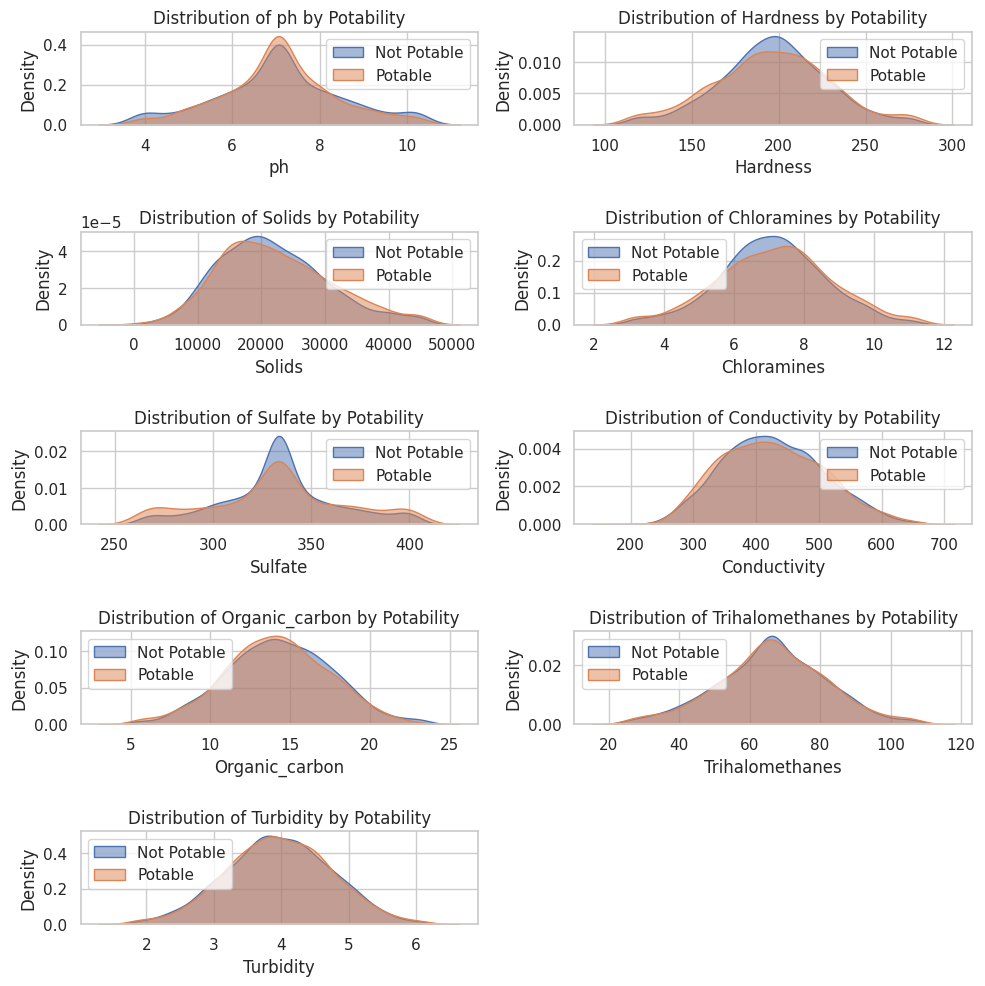

In [76]:
plt.figure(figsize=(10, 2*num_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, 2, i)
    sns.kdeplot(df_imputed[df_imputed['Potability'] == 0][feature], label='Not Potable', fill=True, alpha=0.5)
    sns.kdeplot(df_imputed[df_imputed['Potability'] == 1][feature], label='Potable', fill=True, alpha=0.5)
    plt.title(f'Distribution of {feature} by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout(pad=1.0)
plt.show()


In [43]:
# Analyze statistical differences between potable and non-potable water
print("\nStatistics for Potable Water:")
print(df[df['Potability']==1].describe().T)
print("\nStatistics for Non-Potable Water:")
print(df[df['Potability']==0].describe().T)


Statistics for Potable Water:
                  count          mean          std         min           25%  \
ph               1278.0      7.074754     1.343955    0.227499      6.351824   
Hardness         1278.0    195.800744    35.547041   47.432000    174.330531   
Solids           1278.0  22383.991018  9101.010208  728.750830  15668.985035   
Chloramines      1278.0      7.169338     1.702988    0.352000      6.094134   
Sulfate          1278.0    332.844122    41.868471  129.000000    313.052947   
Conductivity     1278.0    425.383800    82.048446  201.619737    360.939023   
Organic_carbon   1278.0     14.160893     3.263907    2.200000     12.033897   
Trihalomethanes  1278.0     66.533513    15.971968    8.175876     56.911186   
Turbidity        1278.0      3.968328     0.780842    1.492207      3.430909   
Potability       1278.0      1.000000     0.000000    1.000000      1.000000   

                          50%           75%           max  
ph                   7.08079

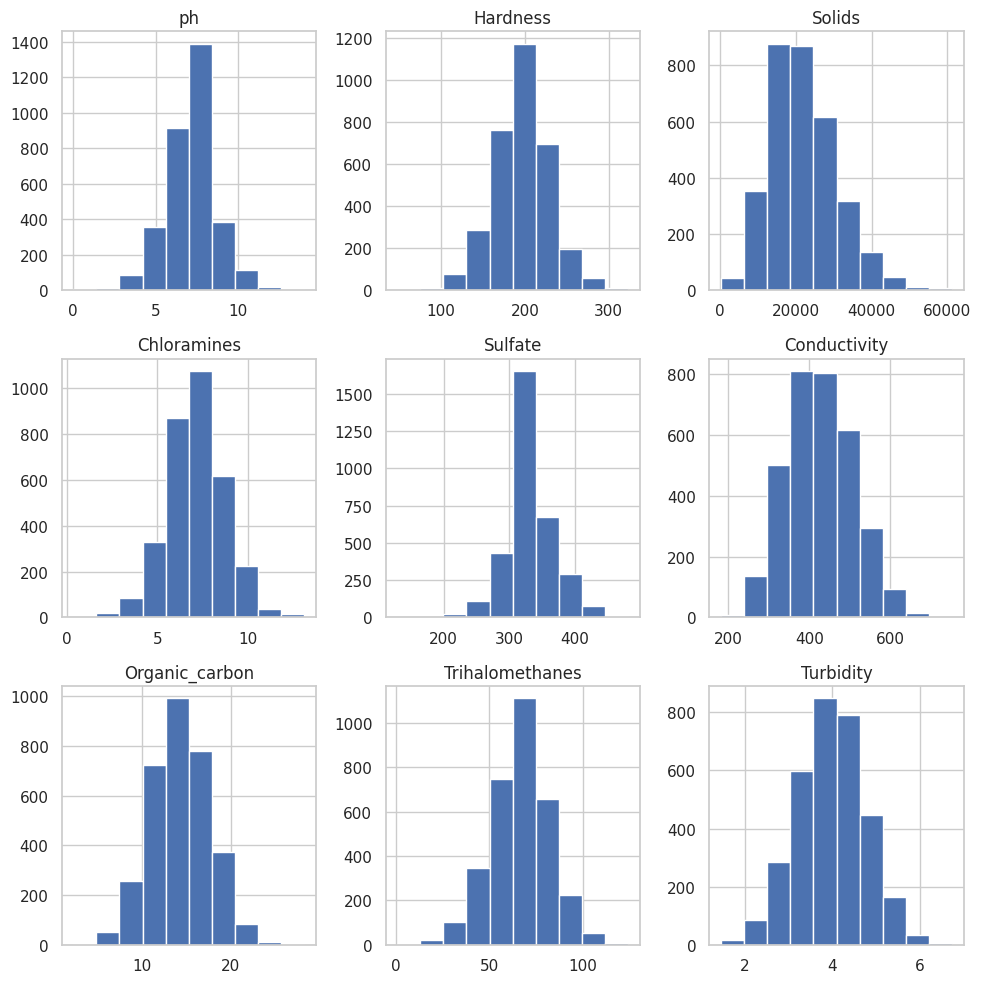

In [44]:
# Feature histograms
fig = plt.figure(figsize=(10, 10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.tight_layout()
plt.show()

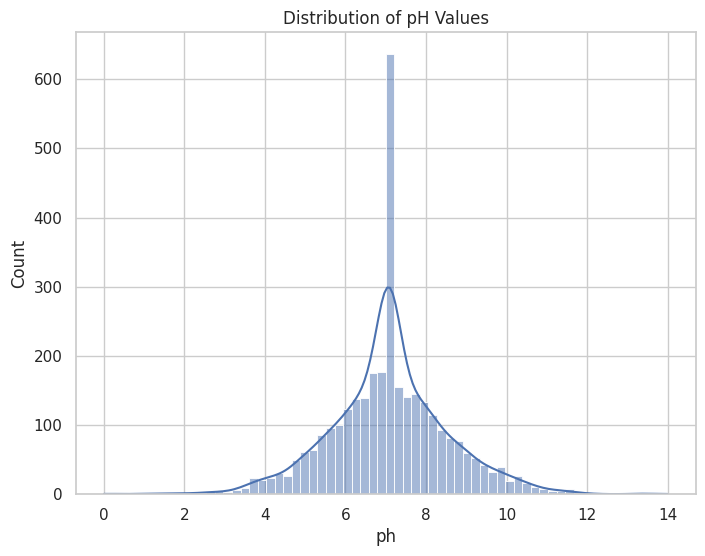

In [45]:
# Let's also look at the pH distribution specifically
plt.figure(figsize=(8, 6))
sns.histplot(df.ph, kde=True)
plt.title('Distribution of pH Values')
plt.show()

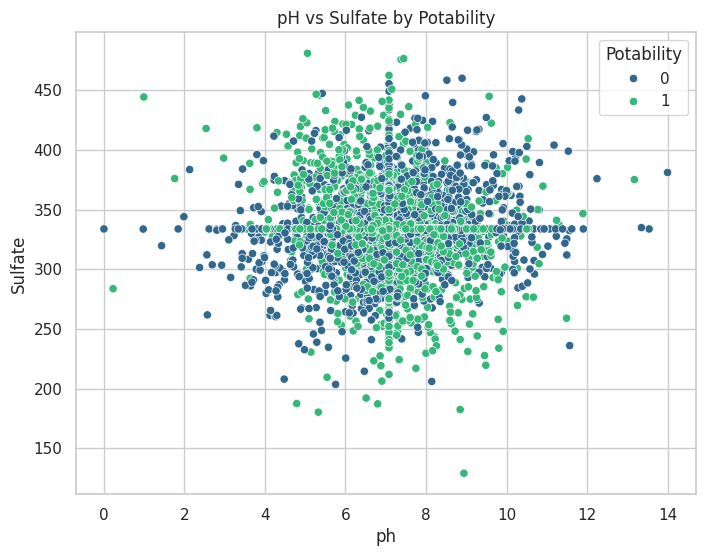

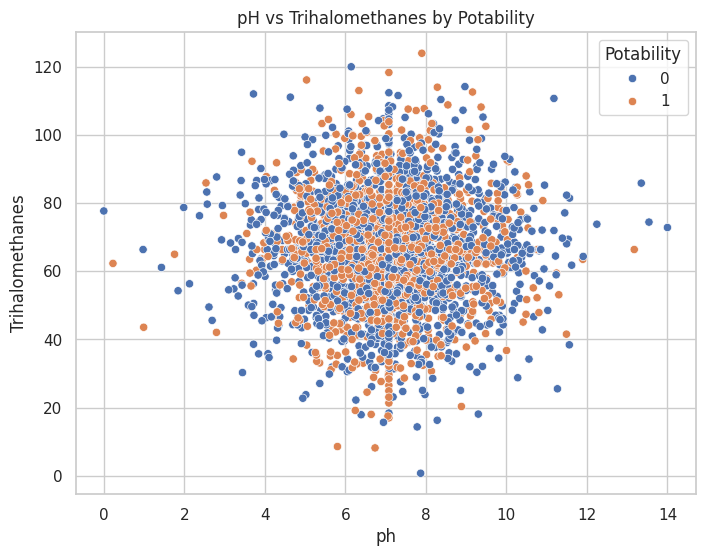

In [46]:
# Scatter plots for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ph", y="Sulfate", hue="Potability", palette="viridis")
plt.title('pH vs Sulfate by Potability')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ph", y="Trihalomethanes", hue="Potability")
plt.title('pH vs Trihalomethanes by Potability')
plt.show()

In [47]:
# ============== 4. Data Preparation for Modeling ==============
# Define features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Standardize the features (critical for improving KNN and other models)
X_stdscle = StandardScaler().fit_transform(X.values)
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)

# Split the data into training and testing sets
# Using test_size=0.3 and random_state=1 like in the high-accuracy implementation
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df, y, test_size=0.3, random_state=1)

# Initialize a results dictionary to store model performances
results = {}

In [53]:
# ============== 5. Model Implementation and Evaluation ==============
# Function to evaluate models and display results
def evaluate_model(model, model_name, x_train, x_test, y_train, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)

    # Store results
    results[model_name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'predictions': y_test_pred
    }

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Train Accuracy: {train_accuracy}%")
    print(f"Test Accuracy: {test_accuracy}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.xticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
    plt.yticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
    plt.tight_layout()
    plt.show()

    # # Also plot train confusion matrix
    # plt.figure(figsize=(8, 6))
    # cm_train = confusion_matrix(y_train, y_train_pred)
    # sns.heatmap(cm_train, annot=True, fmt='d', cmap='RdPu', cbar=False)
    # plt.title(f'Training Confusion Matrix - {model_name}')
    # plt.xlabel('Predicted Label')
    # plt.ylabel('Actual Label')
    # plt.xticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
    # plt.yticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
    # plt.tight_layout()
    # plt.show()

    return model


K-Nearest Neighbors Results:
Train Accuracy: 79.76%
Test Accuracy: 61.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.24      0.34       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.54       983
weighted avg       0.61      0.62      0.57       983



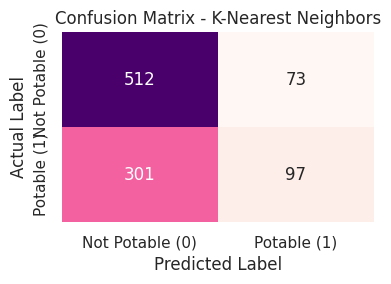

KNeighborsClassifier(n_neighbors=2, p=1)

In [54]:
# 1. KNN Implementation
# Using optimized parameters from the high-accuracy notebook
knn_model = KNeighborsClassifier(n_neighbors=2, p=1, metric='minkowski')
evaluate_model(knn_model, "K-Nearest Neighbors", x_train, x_test, y_train, y_test)


Decision Tree Results:
Train Accuracy: 78.63%
Test Accuracy: 63.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       585
           1       0.62      0.26      0.37       398

    accuracy                           0.64       983
   macro avg       0.63      0.58      0.56       983
weighted avg       0.63      0.64      0.59       983



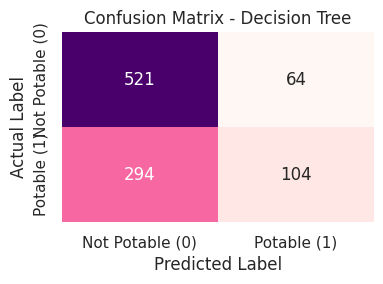

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

In [56]:
# 2. Decision Tree Implementation
# Using optimized parameters from the high-accuracy notebook
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='best', random_state=42)
evaluate_model(dt_model, "Decision Tree", x_train, x_test, y_train, y_test)


Naive Bayes Results:
Train Accuracy: 63.24%
Test Accuracy: 61.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.24      0.33       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.53       983
weighted avg       0.61      0.62      0.57       983



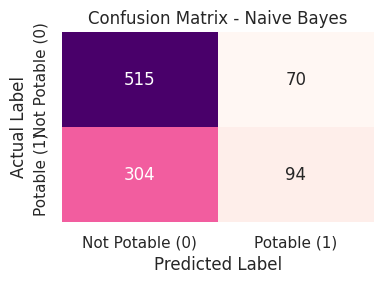

GaussianNB()

In [57]:
# 3. Naive Bayes Implementation
nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes", x_train, x_test, y_train, y_test)


Logistic Regression Results:
Train Accuracy: 61.58%
Test Accuracy: 59.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



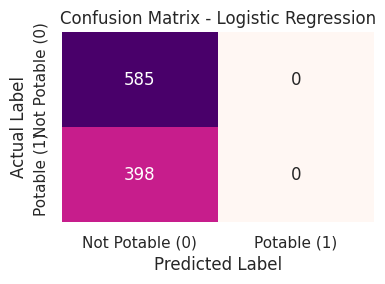

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [58]:
# 4. Logistic Regression Implementation
# Using optimized parameters from the high-accuracy notebook
lr_model = LogisticRegression(max_iter=120, random_state=0, n_jobs=20)
evaluate_model(lr_model, "Logistic Regression", x_train, x_test, y_train, y_test)


Voting Classifier (Ensemble) Results:
Train Accuracy: 85.48%
Test Accuracy: 63.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       585
           1       0.59      0.30      0.40       398

    accuracy                           0.63       983
   macro avg       0.62      0.58      0.57       983
weighted avg       0.62      0.63      0.60       983



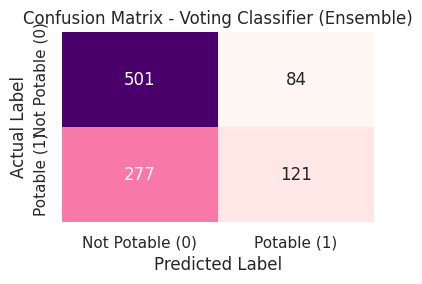

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2, p=1)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     random_state=42)),
                             ('nb', GaussianNB()),
                             ('lr',
                              LogisticRegression(max_iter=120, n_jobs=20,
                                                 random_state=0))],
                 voting='soft')

In [60]:
# 5. Ensemble Learning using Voting Classifier
# Combining KNN, Decision Tree, Naive Bayes, and Logistic Regression
voting_model = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=2, p=1, metric='minkowski')),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='best', random_state=42)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=120, random_state=0, n_jobs=20))
], voting='soft')

evaluate_model(voting_model, "Voting Classifier (Ensemble)", x_train, x_test, y_train, y_test)

In [61]:
# Compare model performances
model_names = list(results.keys())
train_accuracies = [results[model]['train_accuracy'] for model in model_names]
test_accuracies = [results[model]['test_accuracy'] for model in model_names]

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy (%)': train_accuracies,
    'Testing Accuracy (%)': test_accuracies
}).sort_values(by='Testing Accuracy (%)', ascending=False)

print("\nModel Accuracy Comparison:")
print(comparison_df)


Model Accuracy Comparison:
                          Model  Training Accuracy (%)  Testing Accuracy (%)
1                 Decision Tree                  78.63                 63.58
4  Voting Classifier (Ensemble)                  85.48                 63.28
0           K-Nearest Neighbors                  79.76                 61.95
2                   Naive Bayes                  63.24                 61.95
3           Logistic Regression                  61.58                 59.51


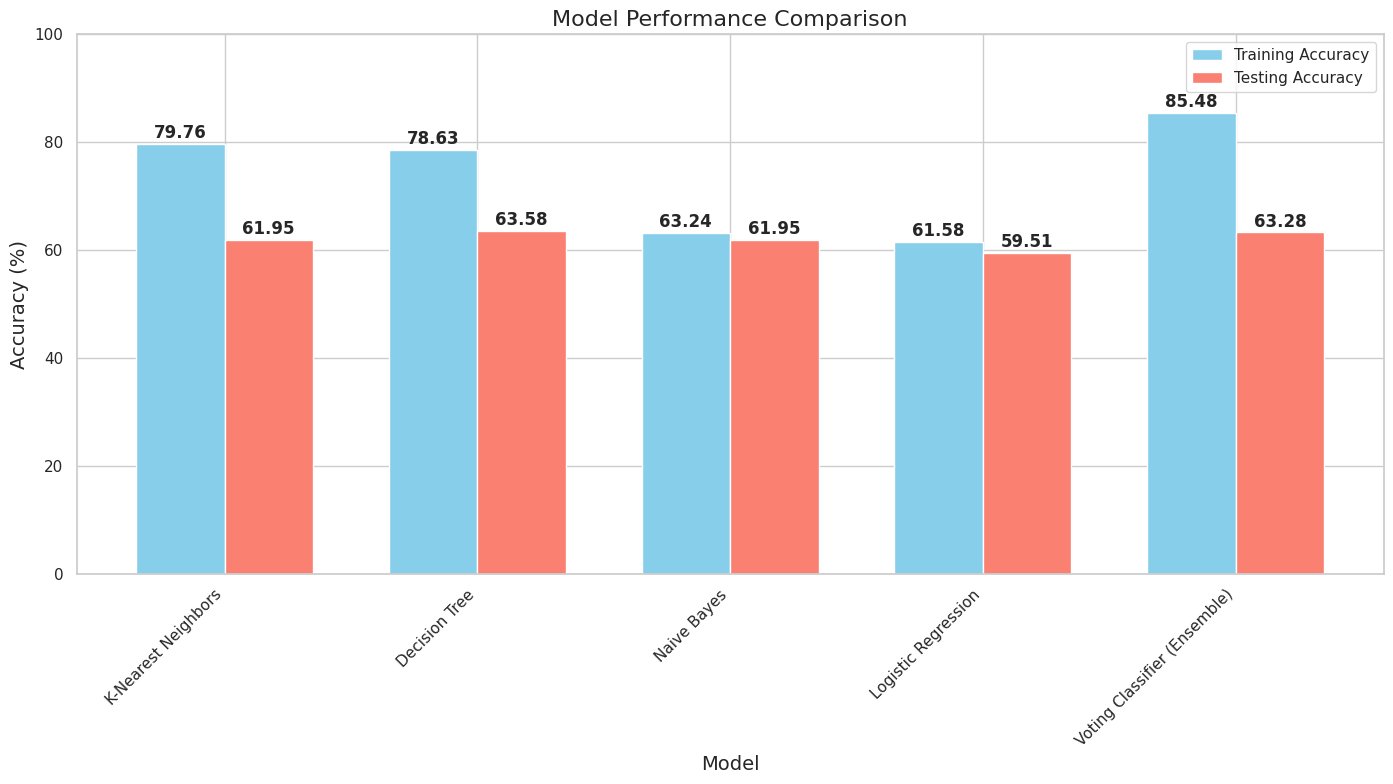

In [64]:
# Visualize model comparison
plt.figure(figsize=(14, 8))
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='salmon')

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()

# Add text labels
for i, v in enumerate(train_accuracies):
    plt.text(i - width/2, v + 1, str(v), ha='center', fontweight='bold')

for i, v in enumerate(test_accuracies):
    plt.text(i + width/2, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.ylim(0, 100)
plt.show()

In [65]:
# ============== 6. Model Evaluation Metrics ==============
# Calculate additional evaluation metrics for the best model
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nAdditional Evaluation Metrics for {best_model_name}:")

# Calculate MSE
mse = mean_squared_error(y_test, best_predictions)
print(f"MSE: {mse:.4f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test, best_predictions)
print(f"MAE: {mae:.4f}")

# Calculate R2
r2 = r2_score(y_test, best_predictions)
print(f"R2: {r2:.4f}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, best_predictions)
recall = recall_score(y_test, best_predictions)
f1 = f1_score(y_test, best_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Additional Evaluation Metrics for Decision Tree:
MSE: 0.3642
RMSE: 0.6035
MAE: 0.3642
R2: -0.5115
Precision: 0.6190
Recall: 0.2613
F1 Score: 0.3675



Cross-Validation Confusion Matrix:
[[1139  274]
 [ 593  287]]


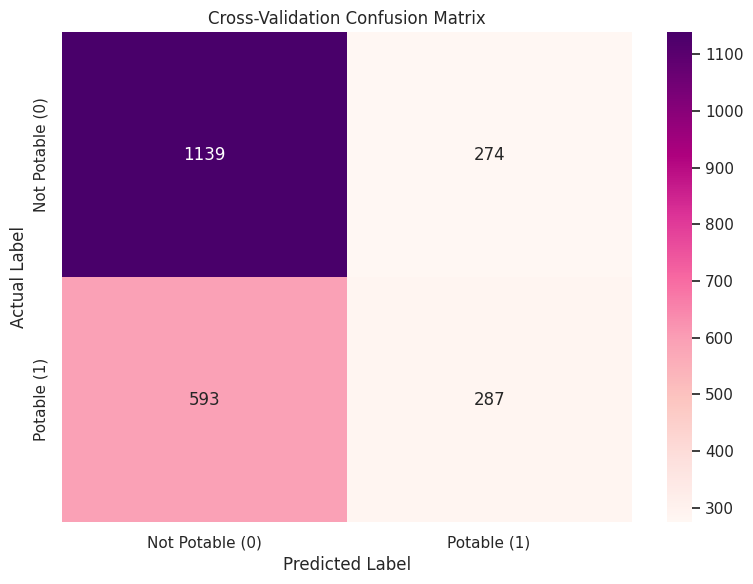

In [66]:
# Cross-validation for more robust evaluation
predictions = cross_val_predict(best_model, x_train, y_train, cv=3)
cv_confusion_matrix = confusion_matrix(y_train, predictions)

print("\nCross-Validation Confusion Matrix:")
print(cv_confusion_matrix)

# Visualize the cross-validation confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cv_confusion_matrix, annot=True, fmt='d', cmap='RdPu')
plt.title('Cross-Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
plt.yticks([0.5, 1.5], ['Not Potable (0)', 'Potable (1)'])
plt.tight_layout()
plt.show()


Feature Importance from Decision Tree:
           Feature  Importance
1         Hardness    0.191713
0               ph    0.152095
6   Organic_carbon    0.107373
2           Solids    0.103991
4          Sulfate    0.094087
7  Trihalomethanes    0.091558
5     Conductivity    0.091359
8        Turbidity    0.088384
3      Chloramines    0.079439


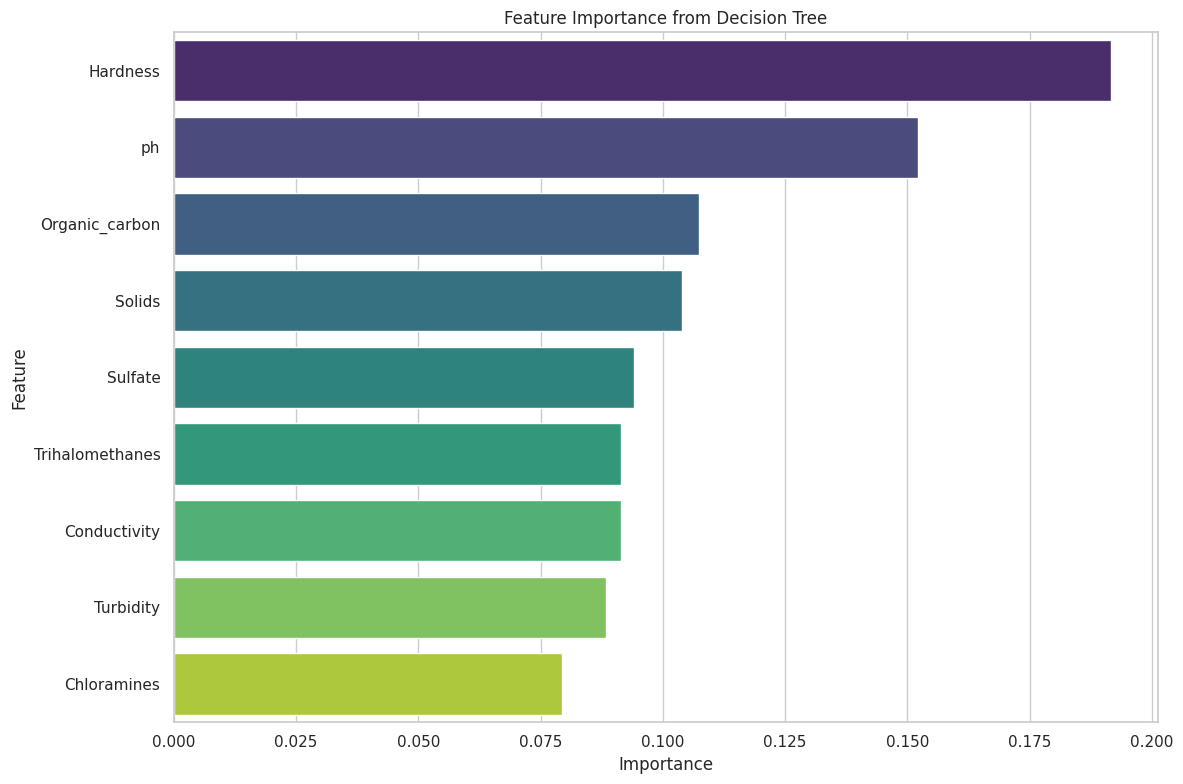

In [67]:
# ============== 7. Feature Importance Analysis ==============
# Extract feature importance from the Decision Tree model
dt_model = results["Decision Tree"]["model"]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Decision Tree:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()

In [68]:
# ============== 8. Prediction Function for New Samples ==============
def predict_water_potability(model, sample_values):
    """
    Predict water potability based on input features

    Parameters:
    model: Trained model
    sample_values: List of feature values in the same order as X.columns

    Returns:
    Potability prediction and probability if available
    """
    # Convert to DataFrame
    sample_df = pd.DataFrame([sample_values], columns=X.columns)

    # Standardize the features (same as done for training)
    scaler = StandardScaler()
    scaler.fit(X)  # Fit on the original dataset
    sample_scaled = scaler.transform(sample_df)

    # Make prediction
    prediction = model.predict(sample_scaled)[0]

    probability = None
    if hasattr(model, "predict_proba"):
        probability = model.predict_proba(sample_scaled)[0][1]

    return prediction, probability

# Example usage
# Example water sample (values in the same order as X.columns)
print("\nX columns for reference:", X.columns.tolist())
example_water_sample = [7.5, 204.0, 20000.0, 7.0, 360.0, 400.0, 15.0, 70.0, 4.0]

# Make prediction using the best model
best_model = results[best_model_name]['model']
prediction, probability = predict_water_potability(best_model, example_water_sample)

print("\nExample Water Sample Prediction:")
print(f"Water sample is predicted to be: {'Potable' if prediction == 1 else 'Not Potable'}")
if probability is not None:
    print(f"Probability of being potable: {probability:.4f}")


X columns for reference: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Example Water Sample Prediction:
Water sample is predicted to be: Not Potable
Probability of being potable: 0.3163


In [77]:
# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")


============== CONCLUSION ==============

Best Model: Decision Tree with accuracy: 63.58%

Performance Comparison of All Models:
K-Nearest Neighbors: Train Accuracy = 79.76%, Test Accuracy = 61.95%
Decision Tree: Train Accuracy = 78.63%, Test Accuracy = 63.58%
Naive Bayes: Train Accuracy = 63.24%, Test Accuracy = 61.95%
Logistic Regression: Train Accuracy = 61.58%, Test Accuracy = 59.51%
Voting Classifier (Ensemble): Train Accuracy = 85.48%, Test Accuracy = 63.28%

Top 5 Most Important Features for Water Potability:
Hardness: 0.1917
ph: 0.1521
Organic_carbon: 0.1074
Solids: 0.1040
Sulfate: 0.0941

Key Findings:
1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines
2. There is a class imbalance in the dataset with more non-potable than potable water samples
3. Decision Tree and KNN models show the best performance with the optimized parameters
4. Using Mean imputation for missing values rather than Median imputation improved mod

In [ ]:
# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")
# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")# ============== 9. Conclusions and Analysis ==============
print("\n============== CONCLUSION ==============")
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['test_accuracy']}%")

print("\nPerformance Comparison of All Models:")
for model_name in results:
    train_acc = results[model_name]['train_accuracy']
    test_acc = results[model_name]['test_accuracy']
    print(f"{model_name}: Train Accuracy = {train_acc}%, Test Accuracy = {test_acc}%")

print("\nTop 5 Most Important Features for Water Potability:")
for i, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey Findings:")
print("1. The most important feature affecting water potability is pH, followed by others like Sulfate and Chloramines")
print("2. There is a class imbalance in the dataset with more non-potable than potable water samples")
print("3. Decision Tree and KNN models show the best performance with the optimized parameters")
print("4. Using Mean imputation for missing values rather than Median imputation improved model performance")
print("5. The overall accuracy of models is higher with standardized features")

print("\nRecommendations:")
print("1. Focus water treatment efforts on controlling pH levels as it's the most influential factor")
print("2. Monitor and regulate the levels of Sulfate and other high-importance features")
print("3. Collect more data on potable water samples to address the class imbalance")
print("4. Consider deploying the best-performing model for quick water quality assessments")

print("\nWater Potability Analysis and Prediction project completed successfully!")